<a href="https://colab.research.google.com/github/sylv0303/Git/blob/main/Brownian_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

#1) Mouvement Brownien

Un Mouvement Brownien est un processus stochastique défini sur $(\Omega, (\mathcal{F}_t)_{t \in [0,T]}, \mathbb{P})$, $B = (B_t)_{t \in [0,T]}$ qui vérifie, par définition :
- $B_0 = 0$ p.s. (avec proba 1)
- Les trajectoires de $t \mapsto B_t(\omega)$ sont continues en $t$
- $\forall t_1 < t_2$, $B_{t_2} - B_{t_1} \sim \mathcal{N}(0, t_2 - t_1)$





##1.1) Discrétisation

Sur $[0,T]$ on a $n$ intervalles avec $n \rightarrow \infty$ \\
pas = $\frac{T}{N} \rightarrow 0$ quand $n \rightarrow +\infty$ \\
$t_{i}^n = \text{pas} \times i$ \\
$t_{i} = \left(\frac{T}{N}\right) \times i$ avec $i = 0,1,...,n$ on a donc $(N+1)$ dates

$$
B_{0} = 0 \\
B_{t_{1}}^n = B_{t_1}^n - B_{t_{0}}^n \sim \mathcal{N}(0, t_{1}^n - t_{0}^n) \sim \mathcal{N}(0, \frac{T}{N})
$$

##1.2) Schéma d'Euler

$B_{0} = 0$ \\
$B_{t_i}^n = B_{t_{i-1}}^n + (B_{t_i}^n - B_{t_{i-1}}^n)$ \\
<=> $B_{t_i}^n - B_{t_{i-1}}^n \sim \mathcal{N}(0, t_{i}^n - t_{i-1}^n) \sim \mathcal{N}(0, \frac{T}{N})$ \\
<=> $B_{t_i}^n = \sqrt{\frac{T}{N}} * G{_i}$ avec $(G{_i})_i^n$ indépendantes et identiquement distribuées de la loi $\mathcal{N}(0,1)$, c'est-à-dire $G{_i} = \frac{B_{t_i}^n - B_{t_{i-1}}^n}{\sqrt{\frac{T}{N}}}$ \\

Pour obtenir une trajectoire discrétisée du Mouvement Brownien B, il faut simuler $G{_1},...,G{_n}$ puis calculer $B_{t_1}^n,...,B_{t_n}^n$ d proche en proche.


In [6]:
# parameters
T = 10 # ex
n = 1000
N = 100 # nbre de trajectoires
pas =T/n
rpas = np.sqrt(pas)
sigma = 0.1
mu = 0.03
S0 = 100
S = S0 * np.ones((n+1,N))

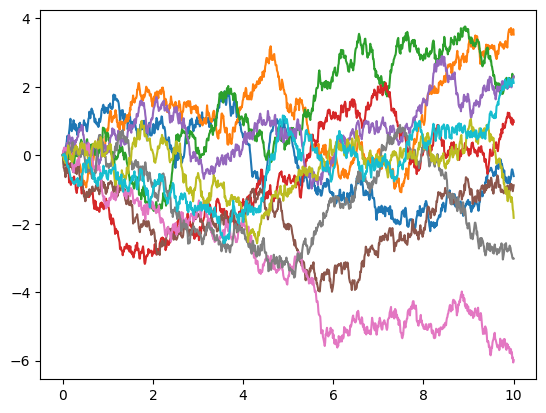

In [3]:
B = np.zeros((n+1,N))
for j in range (N):
  for i  in range (1, n+1):
    B[i,j] = B[i-1,j] + rpas * np.random.randn()

dates = np.linspace(0, T, n+1) #dates de 0 à T -> (n+1) dates
plt.plot(dates, B)
plt.show()

##1.3) Le modèle de Black & Scholes
On se donne une base stochastique $(\Omega, (\mathcal{F}_t)_{t \in [0,T]}, \mathbb{P})$. Le marché financier qu'on considère est composé de 2 actifs :
- actif sans risque de prix $S_{t}^0$ = $e^{rt}$
- actif risqué modélisé par un processus stochastique $(\mathcal{S}_t)_{t \in [0,T]}$ avec $S_t$ qui est $F_{t-mes}$. Son prix vérifie la dynamique suivante : $dS_t = σ S_t * dB_t + µ S_t d_t $ où $B$ est un mouvement Brownien avec $σ>0$ et $S_t = S_0 e^{σB_t + (µ-\frac{σ^2}{2})}$

\
La dynamique en discret peut s'écrire :\
$dS_t = S_{t+d_t} - S_t = σ S_t * (B_{t+d_t} - B_t) + µ S_t d_t $ \
or on sait que $B_{t+d_t} - B_t \sim \mathcal{N}(0, t+d_t-t) \sim \mathcal{N}(0, d_t) = \sqrt{d_t} \sim \mathcal{N}(0,1)$
\
\
Le schéma d'Euler appliqué au modèle de B&S se récrit : \
$S_{t_0}^n = S_0$ \
$S_{t_i}^n = S_{t_{i-1}}^n + σ S_{t_{i-1}}^n * \sqrt{\frac{T}{N}}  G{_i} + µ S_{t_{i-1}}^n * \frac{T}{N} $



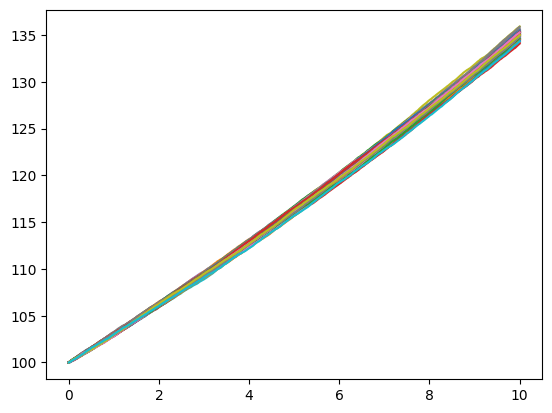

In [11]:
S = S0 * np.ones((n+1,N))
for j in range (N):
  for i in range(1,n+1):
    S[i,j] = S[i-1,j] + sigma * rpas * np.random.randn() + mu * S[i-1,j] * pas

dates = np.linspace(0,T,n+1)
plt.plot(dates, S)
plt.show()

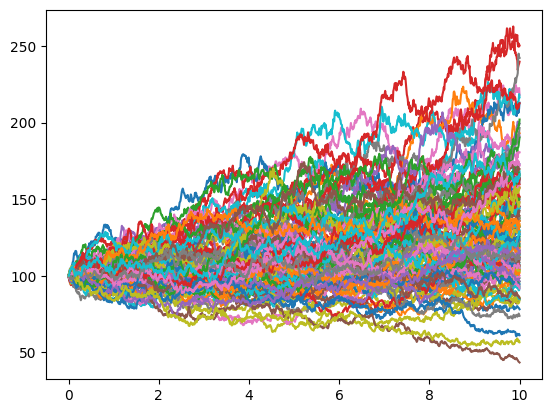

In [8]:
def f(B,t):
  y = S0 * np.exp(sigma * B + (mu - (sigma**2)/2) * t)
  return y

B = np.zeros((n+1,N))
S = S0 * np.ones((n+1,N))
for j in range (N):
  for i  in range (1, n+1):
    B[i,j] = B[i-1,j] + rpas * np.random.randn()
    S[i,j] = f(B[i,j], pas * i)

dates = np.linspace(0, T, n+1) #dates de 0 à T -> (n+1) dates
plt.plot(dates, S)
plt.show()

##1.4) Estimation d'une intégrale d'ITO


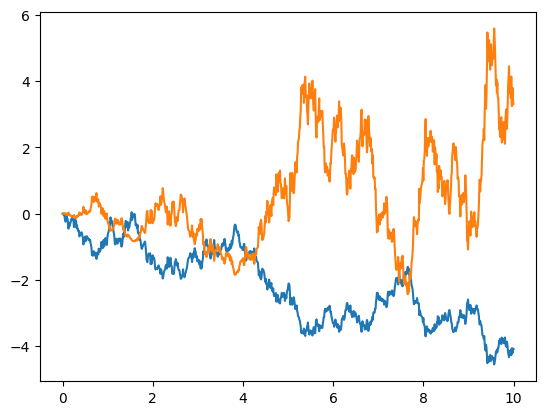

In [15]:
# parameters
T = 10 # ex
n = 1000
N = 1 # nbre de trajectoires
pas =T/n
rpas = np.sqrt(pas)


B = np.zeros((n+1,N))
I = np.zeros((n+1,N))

for j in range(N):
  for i in range (1,n+1):
    B[i,j] = B[i-1,j] + rpas * np.random.randn()
    I[i,j] = I[i-1,j] + B[i-1,j] * (B[i,j] - B[i-1,j])

dates = np.linspace(0,T,n+1)
plt.plot (dates,B)
plt.plot(dates, I)
plt.show()